# Lisa Cohen

MCP210C take-home final exam, Dr. Calvert

May 28, 2016

In [11]:
# DRAFT - NOT FINISHED YET

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# What is the cost of consuming/metabolizing ethanol? 

Organisms need energy to move, do work, grow, and reproduce. Chemical potential energy is gained by metabolizing nutrients. Metabolic costs and gains are measured in Adenosine Triphosphate (ATP) units when chemical bonds are formed and broken by hydrolysis: 

ATP <-> ADP + Pi

For example, over 40% of an organism's energy is used to drive Na+/K+ ATPases, requiring a constant supply of ATP to maintain osmotic balance and resting membrane potentials.  

Under physiological conditions, free energy (deltaG) = -50 kJ/mole is released when 1 mole of ATP is hydrolyzed. Negative free energy values indicate a favorable (exergonic), forward-moving reaction, whereas positive values indicate additional energy input is required. Free energy takes into consideration temperature as well as the concentrations of both reactants and products: 

deltaG = -RT ln Keq

where Keq = [reactants] / [products]

Thus, concentrations of reactants and products play an important role in the free energy available to do work and drive reactions in the forward and reverse directions. Under physiological conditions (temperature = 310 K and pH = 7), a series of processes containing multiple steps (glycolysis, tricarboxylic acid (TCA) cycles and oxidative phosphorylation) convert glucose - a 6 carbon molecule - to ATP. Metabolism of glucose (1g) produces 32 mole of ATP:

C6H12O6 + 6 O2 + 32 ADP + 32 Pi -> 6CO2 + 6H2O + 32 ATP

Free energy available initially available from glucose is deltaG = -2870 kJ/mole. The collective process of forming 32 ATP from glucose oxidation has an overall favorable free energy, deltaG = -967 kJ/mole. Oxidative phosphorylation is driven by an accumulation of reducing agents, NAD+ and NADP+ and FAD+. 

Here, we will explore the metabolic costs of consuming ethanol as opposed to glucose. Ethanol - a 2 carbon molecular - is metabolized in the liver by alcohol dehydrogenase (ADH) and aldehyde dehydrogenase (ALDH) enzymes then converted to acetate. Excess NADH accumulates as a result, which inhibits NAD+ requiring reactions such as gluconeogenesis and fatty acid oxidation. Inhibition of fatty acid oxidation causes elevated triacylglycerol levels in the liver. Plasma lactate also accumulates. Then, acetate is converted to acetyl-CoA, which proceeds in a similiar manner to glucose metabolism, reacting with oxaloacetate then enters the tricarboxylic acid (TCA) cycle and subsequently the electron transport chain (ETC) produces ATP. Heat is produced.

** Assumptions: **

* no uncoupling/proton leaking
* Ordinarily, there are 3 sources of acetyl CoA: 1) amino acid degradation produces cytosolic acetyl CoA, 2) fatty acid axidation produces mitochondrial acetyl CoA, 3) glycolysis yields cytosolic pyruvate -> transported to mitochondria -> converted to acetyl CoA by pyruvate dehydrogenase. In this case of ethanol metabolism, NAD+ requiring reactions are inhibited, 1) and 2) are not considered and 3) is modified to start from Acetyl-CoA. 
* glycolysis/pyruvate metabolism not considered


** References **
    
CRC Handbook of Chemistry and Physices, 96th Edition (2015-2016)
Section 5: Thermochemistry, Electrochemistry, and Solution Chemistry
Thermodynamic Properties of Chemical Substances
[http://www.hbcpnetbase.com/]

Miller and Smith-Magowan. 1990. The Thermodynamics of the Krebs Cycle and Related Compounds. 
J. Phys. Chem. Ref. Data, Vol. 19(4)
[http://www.nist.gov/srd/upload/jpcrd394.pdf]

Goldgerg et al. 1993. Thermodynamics of Enzyme-Catalyzed Reactions: Part 1. Oxidoreductases. J. Phys. Chem. Ref. Data, Vol. 22(2).
[http://www.nist.gov/srd/upload/jpcrd453.pdf]

Flamholz et al. 2011 eQuilibrator - the biochemical thermodynamics calculator. Nucleic Acids Research. [doi: 10.1093/nar/gkr874](http://nar.oxfordjournals.org/content/early/2011/11/07/nar.gkr874.full)


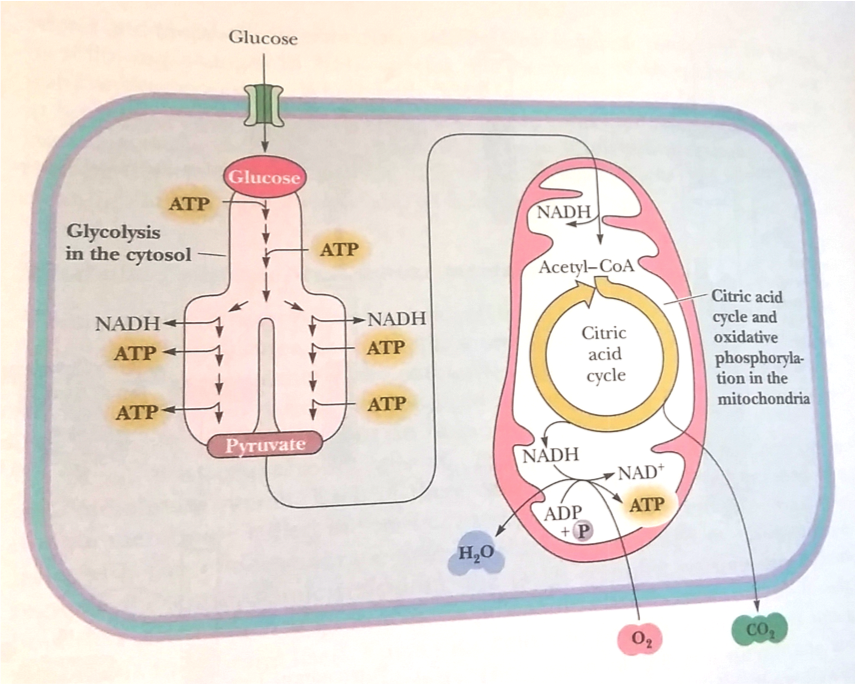

In [13]:
Image(filename='compartmentalization.png')

In [14]:
# build model of digestion, absorption, assimilation of starch
# input: 1 mole ethanol
# four routes:
# 1) lose as heat
# 2) lose as carbon dioxide and water
# 3) store as fat:
# 4) use for ATP production (TCA + oxidative phosphorylation)



# Gibbs free energy of formation
# units in kJ/mol
# Input, 1 g 100% ethanol
deltaG_ethanol = -174.8

# Assume: no cost for digestion, EtOH absorbed passively through digestion -> blood stream -> liver
# In hepatocytes, metabolism:

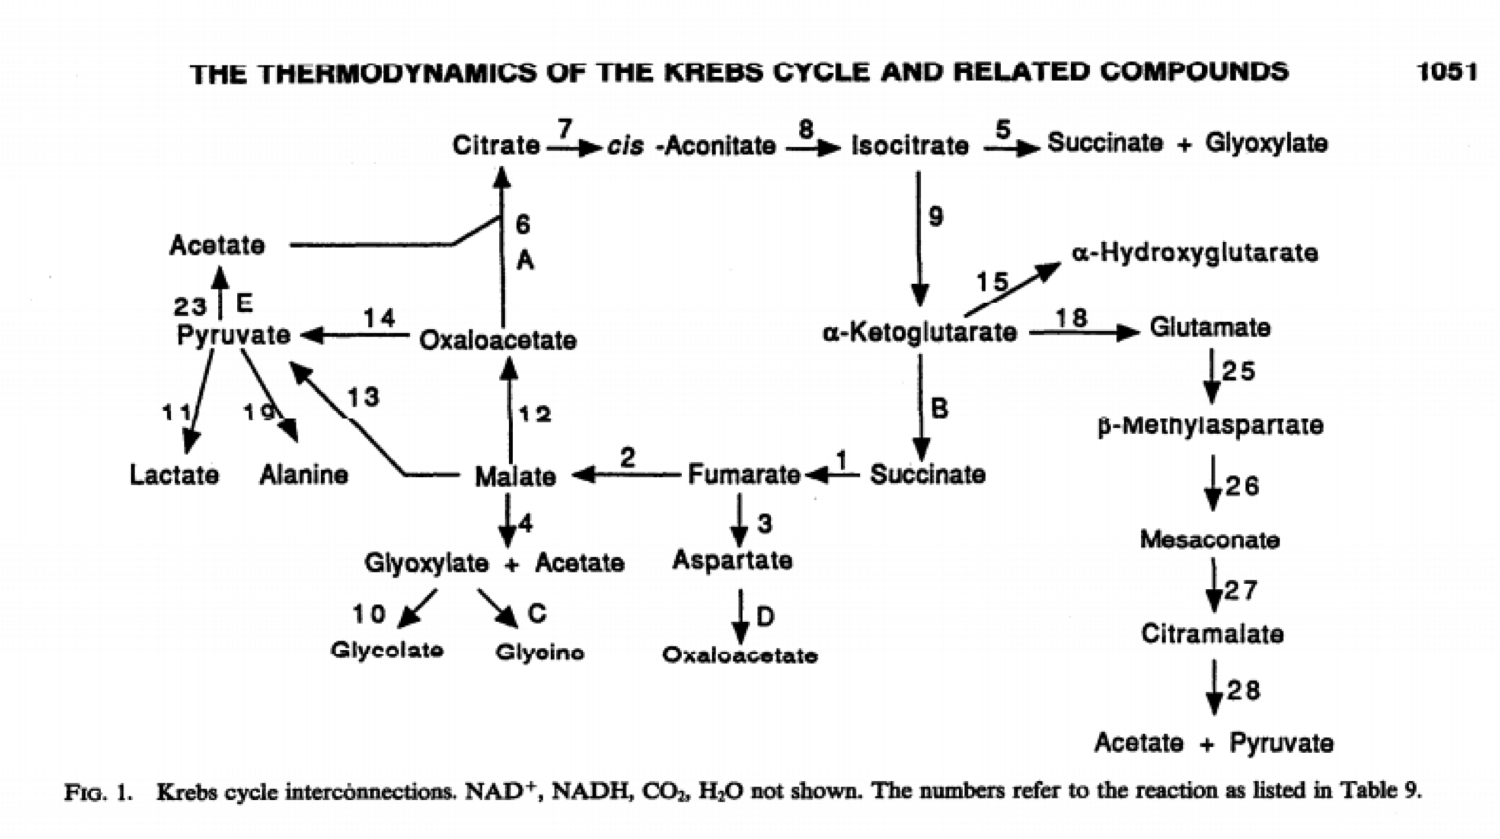

In [15]:
Image(filename='krebs.png')
# Miller and Smith-Magowan (1990)

under physiological conditions,
total deltaG of ethanol processing (kJ/mol) =  -27.6


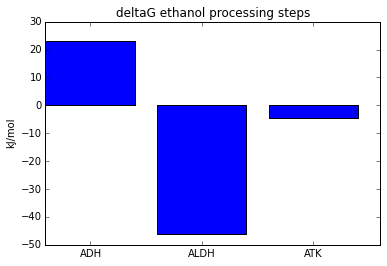

In [16]:
# Gibbs free energy of formation
# all units in kJ/mol

# A. Ethanol metabolism

# ethanol + NAD+ -> acetaldehyde + NADH + H+
# alcohol dehydrogenase (ADH)
deltaG_acetaldehyde = -127.6

# Goldberg et al. 1993
# assuming T = 298.15 K, pH 7
deltaG_ADH = 22.9

# acetaldehyde + NAD+ -> acetate + NADH + H+
# aldehyde dehydrogenase (ALDH)
# CRC
deltaG_acetate = -389.9
# Miller and Smith-Magowan (1990)
deltaG_acetate = -371.57

# http://equilibrator.weizmann.ac.il/
deltaG_ALDH = -46.0

# acetate + ATP + CoA -> 2Pi + AMP + Acetyl-CoA
# acetate thiokinase (ATK)
# http://equilibrator.weizmann.ac.il/compound?compoundId=C00024
# http://equilibrator.weizmann.ac.il/enzyme?ec=6.2.1.1
deltaG_ATK = -4.5

# formation of Acetyl-CoA
deltaG_EtOH_metabolism = deltaG_ADH + deltaG_ALDH + deltaG_ATK

print "under physiological conditions,"
print "total deltaG of ethanol processing (kJ/mol) = ",deltaG_EtOH_metabolism

N = 3
ind = np.arange(N)
y = (deltaG_ADH,deltaG_ALDH,deltaG_ATK)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('deltaG ethanol processing steps')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("ADH","ALDH","ATK"))
plt.show()

In [45]:
# END RESULT:
# acetyl CoA
# Excess NADH, inhibits NAD+-requiring reactions, such as gluconeogenesis and fatty acid oxidation
# AMP
# 2Pi

deltaG_NADH = -397.48
deltaG_AcetylCoA = -1872.9
# Products
deltaG_results = deltaG_AcetylCoA + deltaG_NADH

# Therefore: 
# fatty acid oxidation is inhibited,
# elevated triacylgrlycerol levels in the liver,
# accumulated lactate

print "under physiological conditions"
print "deltaG of products after ethanol processing (kJ/mol) = ",deltaG_results

under physiological conditions
deltaG of products after ethanol processing (kJ/mol) =  -2270.38


under physiological conditions
deltaG of Krebs reactions (kJ/mol) =  -108.96


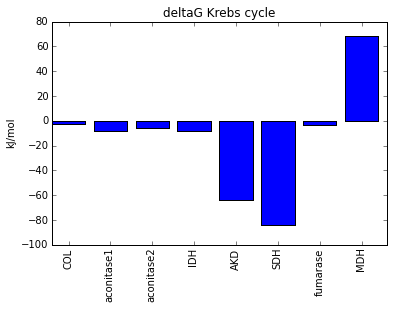

In [47]:
# Gibbs free energy of formation
# all units in kJ/mol

# B. acetyl CoA->citrate->TCA

# TCA:
# Acetate -> citrate -> cis-Aconitate -> Isocitrate -> 
# alpha-ketoglutarate -> fumarate -> malate -> oxaloacetate -> citrate 

# actyl-CoA->citrate (citrate synthase)
# citrate->isocitrate (aka 1-Hydroxypropane-1,2,3-tricarboxylic acid) (aconitase)
# isocitrate->alpha-ketoglutarate (isocitrate dehydrogenase)
# alpha-ketoglutarate->succinyl-CoA (alphta-ketoglutarate dehydrogenase)
# succinyl-CoA->succinate (succinyl-CoA synthetase)
# succinate->fumarate (succinate dehydrogenase)
# fumarate->malate (fumarase)
# malate->oxaloacetate (malate dehydrogenase)

# citric acid (CRC)
deltaG_citrate = -1543.8
# citrate (Miller and Smith-Magowan 1990)
deltaG_isocitrate = -1172.59 
deltaG_alphaketoglut = -801.97
deltaG_succinate = 690.08
deltaG_fumarate = -605.61
deltaG_malate = -846.14
deltaG_oxaloacetate = -798.71

# Gibb energy required for the following Krebs reactions:
# 1. fumarate + H2 -> succinate
deltaG_SDH = -84.43

# 2. fumarate + H20 -> L-malate
deltaG_fumarase = -3.57

# 6. acetate + oxaloacetate -> citrate 
# COL = citrate-oxaloacetate lyase
deltaG_COL = -2.43

# 7. cis-aconitate + H2O -> citrate
deltaG_aconitase1 = -8.49

# 8. isocitrate -> citrate
deltaG_aconitase2 = -6.11

# 9. isocitrate + NADP+ -> alpha-ketoglutarate + NADPH + CO2 (gas)
# IDH = isocitrate dehydrogenase
deltaG_IDH = -8.0

# 12. L-malate + NAD+ -> oxaloacetate + NADH + H+
# MDH = malate dehydrogenase
deltaG_MDH = 68.37

# B. alpha-ketoglutarate + NAD+ + H20 => succinate + NADH + H+ + CO2(g)
# AKD = alpha-ketoglutarate dehydrogenase
deltaG_AKD = -64.3

# steps 7, 8, 9, B, 1, 2, 12, 6 from Miller and Smith-Magowan (1990)ac
# Acetate -> citrate -> cis-Aconitate -> Isocitrate -> 
# alpha-ketoglutarate -> fumarate -> malate -> oxaloacetate -> citrate 

deltaG_Krebs =  deltaG_COL + deltaG_aconitase1 + deltaG_aconitase2 + deltaG_IDH + \
deltaG_AKD + deltaG_SDH + deltaG_fumarase + deltaG_MDH
print "under physiological conditions"
print "deltaG of Krebs reactions (kJ/mol) = ",deltaG_Krebs

N = 8
ind = np.arange(N)
y = (deltaG_COL,deltaG_aconitase1,deltaG_aconitase2,deltaG_IDH,deltaG_AKD,deltaG_SDH,deltaG_fumarase,deltaG_MDH)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('deltaG Krebs cycle')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("COL","aconitase1","aconitase2","IDH","AKD","SDH","fumarase","MDH"),rotation = 'vertical')
plt.show()


In [ ]:
# OR
# C. Fatty Acid (FA) Metabolism
# I. FA Anabolism: 
# acetyl CoA-> palmitate (aka hexadecanoic acid)
# Assuming input of existing malonyl-acyl carrying protein (ACP)
# acetoacetyl-ACP->D-beta-hydroxybutyrl-ACP->crotonyl-ACP->butryryl-ACP->palmitoyl-ACP->palmitate


# http://webbook.nist.gov/cgi/cbook.cgi?Name=Palmitic+acid&Units=SI
deltaH_palmitate = -838.1


# resulting in the release of CO2
# 2NADPH + 2H+ -> 2NADP+
# requires input of water, release of ACP-SH


# II. FA Catabolism:


## How much ATP energy can be produced from 1 mole of ethanol?

In [46]:
# Budweiser, 12 oz
# percent by vol
# how many grams is that?
Bud_alcohol = 5.0
Bud_Calories = 143
# assuming 1 Cal = 4.184 kJ
Bud_kJ = 598.312
# grams
Bud_carbs = 10.6


# wine, 5 oz
# percent by vol
# how many grams is that?
wine_alcohol = 9.5
wine_Calories = 120
# assuming 1 Cal = 4.184 kJ
wine_kJ = 502
# grams
wine_carbs = 5.5


